In [1]:
import json

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import escreve_xlsx as es

In [4]:
# path = "C:\\saida_teste\\relatorio_json_atualizado.xlsx"
# path = "C:\\saida_teste\\dados_reais_2kamostras.xlsx"
path = "C:\\saida_teste\\dados_reais_2kamostras_novo_algo_categorias.xlsx" 
def get_dados(path):
    with open(path + ".txt", 'r') as file:
        text = file.read()
    
    text = text.replace("\'", "\"")
    text = text.replace("nan", "\"nan\"")
    data = json.loads(text)
    return data
# data


with open('data.json', 'w') as f:
    data = get_dados(path)
    f.write(json.dumps(data))

In [5]:
def get_descritor_catalogo(data, categoria, descritor, r_medido, r_max):
    def cr_f_categoria(categoria):
        def filter_categoria(element):
            return element['categoria'] == categoria
        return filter_categoria
    
    def map_element(element):
        return lambda x: x[element]
#     def c_map(element):
#         return element['list_kappa_cat']
#     def c_map_2(element):
#         return element
    strin = ""
    if(r_max):
        strin = "list_kappa_cat_max"
    else:
        strin = "list_kappa_cat"

    saida = []
    if (r_medido):
        saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
    else:
        for item in data['varios_kappa']:
            saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
#     print(saida)
    saida = list(map(map_element(descritor), saida))
    
    return saida





In [6]:
# def get_lis_categoria_categoria(categoria, descritor, r_medido, r_max):
#     def cr_f_categoria(categoria):
#         def filter_categoria(element):
#             return element['categoria'] == categoria
#         return filter_categoria
    
#     def map_element(element):
#         return lambda x: x[element]
# #     def c_map(element):
# #         return element['list_kappa_cat']
# #     def c_map_2(element):
# #         return element
#     strin = ""
#     if(r_max):
#         strin = "catalogo_var_max"
#     else:
#         strin = "catalogo_var"

#     saida = []
#     if (r_medido):
#         saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
#     else:
#         for item in data['varios_kappa']:
#             saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
#     print(saida)
#     saida = list(map(map_element(descritor), saida))
    
#     return saida

In [7]:
# data
# get_lis_categoria_categoria("Swimming", 'kappa', False, True)
data['varios_kappa'][2]['catalogo_var_max']

{'categoria': 'Catalog',
 'observada': 0.994606,
 'acaso': 0.327215,
 'vies': 0.0052589,
 'kappa': 0.991983,
 'prevalencia': 0.735032,
 'matriz_concordancia': [[710, 8, 12, 2, 0, 6, 0],
  [0, 2818, 0, 0, 0, 0, 0],
  [0, 0, 654, 0, 0, 0, 0],
  [0, 0, 0, 130, 0, 0, 0],
  [0, 12, 0, 0, 54, 0, 0],
  [0, 0, 0, 0, 0, 3000, 0],
  [0, 0, 0, 0, 0, 0, 10]]}

In [8]:
data['varios_kappa'][0]['catalogo_var']

{'categoria': 'Catalog',
 'observada': 0.844705,
 'acaso': 0.326497,
 'vies': 0.133629,
 'kappa': 0.769421,
 'prevalencia': 0.64823,
 'matriz_concordancia': [[443, 236, 12, 0, 8, 40, 0],
  [213, 2410, 32, 4, 29, 128, 4],
  [13, 37, 534, 4, 4, 64, 0],
  [0, 1, 5, 116, 0, 11, 0],
  [6, 38, 5, 0, 11, 8, 0],
  [38, 114, 81, 9, 5, 2756, 0],
  [0, 5, 0, 0, 0, 0, 7]]}

In [9]:
get_descritor_catalogo(data, "Diving", 'kappa', False, True)

[0.81227,
 0.81227,
 0.81227,
 0.81227,
 0.81227,
 0.840331,
 0.840331,
 0.840331,
 0.840331,
 0.840331,
 0.83347,
 0.83347,
 0.83347,
 0.83347,
 0.83347,
 0.819156,
 0.819156,
 0.819156,
 0.819156,
 0.819156,
 0.812188,
 0.812188,
 0.812188,
 0.812188,
 0.812188,
 0.819157,
 0.819157,
 0.819157,
 0.819157,
 0.819157,
 0.829783,
 0.829783,
 0.829783,
 0.829783,
 0.829783,
 0.849167,
 0.849167,
 0.849167,
 0.849167,
 0.849167,
 0.815706,
 0.815706,
 0.815706,
 0.815706,
 0.815706,
 0.820381,
 0.820381,
 0.820381,
 0.820381,
 0.820381,
 0.790644,
 0.790644,
 0.790644,
 0.790644,
 0.790644,
 0.846054,
 0.846054,
 0.846054,
 0.846054,
 0.846054,
 0.822146,
 0.822146,
 0.822146,
 0.822146,
 0.822146,
 0.817703,
 0.817703,
 0.817703,
 0.817703,
 0.817703,
 0.802834,
 0.802834,
 0.802834,
 0.802834,
 0.802834,
 0.794731,
 0.794731,
 0.794731,
 0.794731,
 0.794731,
 0.819064,
 0.819064,
 0.819064,
 0.819064,
 0.819064,
 0.829692,
 0.829692,
 0.829692,
 0.829692,
 0.829692,
 0.826148,
 0.826148

In [10]:
# data['çs']

In [11]:
# # pega os dados medidos
# get_lis_categoria('Swimming','kappa', True, True)
# # pega os dados bootstrap
# get_lis_categoria('Swimming', 'kappa', False, True)

In [12]:

amax = get_descritor_catalogo(data, 'Swimming', 'kappa', False, True)

ames = get_descritor_catalogo(data, 'Swimming', 'kappa', False, False)

ames, amax

([0.857959,
  0.857959,
  0.857959,
  0.857959,
  0.857959,
  0.850713,
  0.850713,
  0.850713,
  0.850713,
  0.850713,
  0.838303,
  0.838303,
  0.838303,
  0.838303,
  0.838303,
  0.853765,
  0.853765,
  0.853765,
  0.853765,
  0.853765,
  0.844185,
  0.844185,
  0.844185,
  0.844185,
  0.844185,
  0.855862,
  0.855862,
  0.855862,
  0.855862,
  0.855862,
  0.856882,
  0.856882,
  0.856882,
  0.856882,
  0.856882,
  0.86228,
  0.86228,
  0.86228,
  0.86228,
  0.86228,
  0.83708,
  0.83708,
  0.83708,
  0.83708,
  0.83708,
  0.852982,
  0.852982,
  0.852982,
  0.852982,
  0.852982,
  0.85517,
  0.85517,
  0.85517,
  0.85517,
  0.85517,
  0.837762,
  0.837762,
  0.837762,
  0.837762,
  0.837762,
  0.840902,
  0.840902,
  0.840902,
  0.840902,
  0.840902,
  0.841858,
  0.841858,
  0.841858,
  0.841858,
  0.841858,
  0.845348,
  0.845348,
  0.845348,
  0.845348,
  0.845348,
  0.842682,
  0.842682,
  0.842682,
  0.842682,
  0.842682,
  0.844039,
  0.844039,
  0.844039,
  0.844039,
  0.844

In [13]:
data['medido']["catalogo_var_max"]['kappa']

0.971533

In [14]:
data['medido']['catalogo_var']

{'categoria': 'Catalog',
 'observada': 0.849145,
 'acaso': 0.32738,
 'vies': 0.133899,
 'kappa': 0.775721,
 'prevalencia': 0.652133,
 'matriz_concordancia': [[411, 271, 16, 0, 6, 53, 0],
  [176, 2393, 52, 0, 45, 140, 7],
  [6, 6, 572, 4, 0, 67, 0],
  [0, 2, 7, 118, 0, 0, 0],
  [5, 24, 6, 0, 10, 2, 0],
  [38, 95, 66, 15, 12, 2798, 0],
  [0, 0, 0, 0, 0, 0, 8]]}

In [15]:
dt =     es.get_descritores_max(False, data)
dt_max = es.get_descritores_max(True, data)

dt

{'categoria': ['Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',

In [16]:
len(dt['observada'])

1667

In [17]:
plt.rcParams["figure.figsize"] = (10,5)

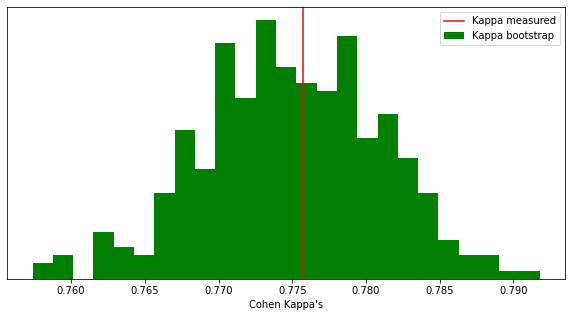

In [18]:
# x = dt['kappa']
plt.tick_params(left = False, labelleft = False)
num_bins = 2

H1 = dt['kappa']
S1 = dt_max['kappa']

# plt.hist([H1,S1], bins=25, range=(0.4,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

plt.hist([H1], bins=25, align=('mid'), color=['green'], label=['Kappa bootstrap'])

# n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

plt.axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
plt.xlabel("Cohen Kappa's")
# Function add a legend  
plt.legend()
plt.show()

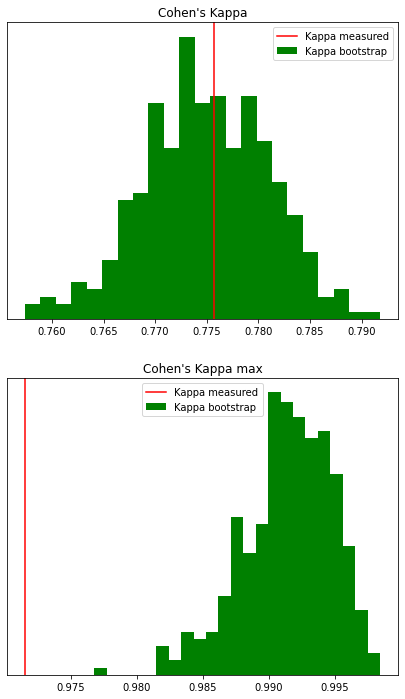

In [41]:
fig, axs = plt.subplots(2)
fig.set_size_inches(7, 12)
axs[0].tick_params(left = False, labelleft = False)
axs[1].tick_params(left = False, labelleft = False)
# axs[2].tick_params(left = False, labelleft = False)
num_bins = 23

H1 = dt['kappa']
S1 = dt_max['kappa']

axs[0].hist([H1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
axs[1].hist([S1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
# axs[2].hist([H1,S1], bins=25, range=(0,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

# n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

axs[0].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
axs[1].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa measured", color='red')

# axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# axs[0].xlabel("Cohen Kappa's")
# Function add a legend  

axs[0].set_title("Cohen's Kappa")
axs[1].set_title("Cohen's Kappa max")


# d = es.get_d_cohen(H1, S1)
# axs[2].set_title("Cohen's d = {:.2f}".format(d))



# text = axs[2].text(1, 1, "d = {:.2f}".format(d))
# text.set_position((0, 5))




axs[0].legend()
axs[1].legend()
plt.savefig('catalogo kappa.png')
plt.show()

In [20]:
data['medido']["catalogo_var_max"]['kappa']

0.971533

In [21]:
dt_max['kappa']

[0.991983,
 0.991983,
 0.991983,
 0.991983,
 0.991983,
 0.990753,
 0.990753,
 0.990753,
 0.990753,
 0.990753,
 0.99359,
 0.99359,
 0.99359,
 0.99359,
 0.99359,
 0.987935,
 0.987935,
 0.987935,
 0.987935,
 0.987935,
 0.987523,
 0.987523,
 0.987523,
 0.987523,
 0.987523,
 0.991588,
 0.991588,
 0.991588,
 0.991588,
 0.991588,
 0.994789,
 0.994789,
 0.994789,
 0.994789,
 0.994789,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991982,
 0.991982,
 0.991982,
 0.991982,
 0.991982,
 0.991169,
 0.991169,
 0.991169,
 0.991169,
 0.991169,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.991573,
 0.990371,
 0.990371,
 0.990371,
 0.990371,
 0.990371,
 0.99557,
 0.99557,
 0.99557,
 0.99557,
 0.99557,
 0.991618,
 0.991618,
 0.991618,
 0.991618,
 0.991618,
 0.993593,
 0.993593,
 0.993593,
 0.993593,
 0.993593,
 0.990695,
 0.990695,
 0.990695,
 0.990695,
 0.990695,
 0.987053,
 0.987053,
 0.987053,
 0.987053,
 0.987053,
 0.995584,
 0.995584,
 0.995584,
 0.995584,
 0.995584,
 0.991958,
 0.991958

In [22]:
def cret_line(valor):
    def creat_lvl(valor):
        return lambda x: valor

    return [creat_lvl(valor)(x) for x in range(2)]



data['medido']['list_kappa_cat']

[{'categoria': 'Swimming',
  'observada': 0.936828,
  'acaso': 0.573795,
  'vies': 0.0134409,
  'kappa': 0.85178,
  'prevalencia': 0.384409,
  'matriz_concordancia': [[411, 57], [37, 983]]},
 {'categoria': 'Immobility',
  'observada': 0.966053,
  'acaso': 0.652513,
  'vies': 0.00793147,
  'kappa': 0.902308,
  'prevalencia': 0.552348,
  'matriz_concordancia': [[2393, 41], [66, 652]]},
 {'categoria': 'Climbing',
  'observada': 0.950249,
  'acaso': 0.528316,
  'vies': 0.0199005,
  'kappa': 0.894524,
  'prevalencia': 0.238806,
  'matriz_concordancia': [[572, 56], [24, 956]]},
 {'categoria': 'Diving',
  'observada': 0.950413,
  'acaso': 0.784298,
  'vies': 0.0446281,
  'kappa': 0.770115,
  'prevalencia': 0.755372,
  'matriz_concordancia': [[118, 57], [3, 1032]]},
 {'categoria': 'Headshaking',
  'observada': 0.94055,
  'acaso': 0.924914,
  'vies': 0.0417036,
  'kappa': 0.208244,
  'prevalencia': 0.922804,
  'matriz_concordancia': [[10, 57], [10, 1050]]},
 {'categoria': 'Undefined',
  'observ

In [23]:
data['medido']['list_kappa_cat_max']

[{'categoria': 'Swimming',
  'observada': 0.986559,
  'acaso': 0.573795,
  'vies': 0.0134409,
  'kappa': 0.968464,
  'prevalencia': 0.384409,
  'matriz_concordancia': [[448, 20], [0, 1020]]},
 {'categoria': 'Immobility',
  'observada': 0.992069,
  'acaso': 0.652513,
  'vies': 0.00793147,
  'kappa': 0.977175,
  'prevalencia': 0.552348,
  'matriz_concordancia': [[2434, 0], [25, 693]]},
 {'categoria': 'Climbing',
  'observada': 0.980099,
  'acaso': 0.528316,
  'vies': 0.0199005,
  'kappa': 0.95781,
  'prevalencia': 0.238806,
  'matriz_concordancia': [[596, 32], [0, 980]]},
 {'categoria': 'Diving',
  'observada': 0.955372,
  'acaso': 0.784298,
  'vies': 0.0446281,
  'kappa': 0.793104,
  'prevalencia': 0.755372,
  'matriz_concordancia': [[121, 54], [0, 1035]]},
 {'categoria': 'Headshaking',
  'observada': 0.958296,
  'acaso': 0.924914,
  'vies': 0.0417036,
  'kappa': 0.444589,
  'prevalencia': 0.922804,
  'matriz_concordancia': [[20, 47], [0, 1060]]},
 {'categoria': 'Undefined',
  'observad

In [24]:
def get_cate_medida(data, cat, r_max):
    def cre_fil_categoria(categoria):
        return lambda x: categoria == x['categoria']

    ls = []
    if r_max:
        ls = data['medido']['list_kappa_cat_max']
    else:
        ls = data['medido']['list_kappa_cat']
        
    saida = list(filter(cre_fil_categoria(cat), ls ))
    return saida[0]


k = get_cate_medida(data, "Swimming", False)['kappa']
k_max = get_cate_medida(data, "Swimming", True)['kappa']


In [25]:
amax = get_descritor_catalogo(data, 'Swimming', 'kappa', False, True)
ames = get_descritor_catalogo(data, 'Swimming', 'kappa', False, False)
es.get_d_cohen(amax, ames)

23.649563166537046

In [26]:
def cre_generate(i):
    return [i, i+0.5]

In [27]:
# fig, ax = plt.subplots()

# ax.plot([k, k], [1, 1.5], label = "Bootstrap Kappa", color= "green", linewidth=4.0)
# ax.plot([k_max, k_max], [1, 1.5], label = "Bootstrap Kappa", color= "yellow", linewidth=4.0)

In [28]:
# # get_lis_categoria(cat, 'kappa', False, True)
# # data['ls_cat_txt'][6] = "Undefined\n(frames that are not marked)"
# data['ls_cat_txt'][6]

In [29]:
data['ls_cat_txt']

['Swimming',
 'Immobility',
 'Climbing',
 'Diving',
 'Headshaking',
 'Undefined',
 'Undefined (frames that are not marked)']

[0.762433 0.786236] [0.983571 0.99679 ]


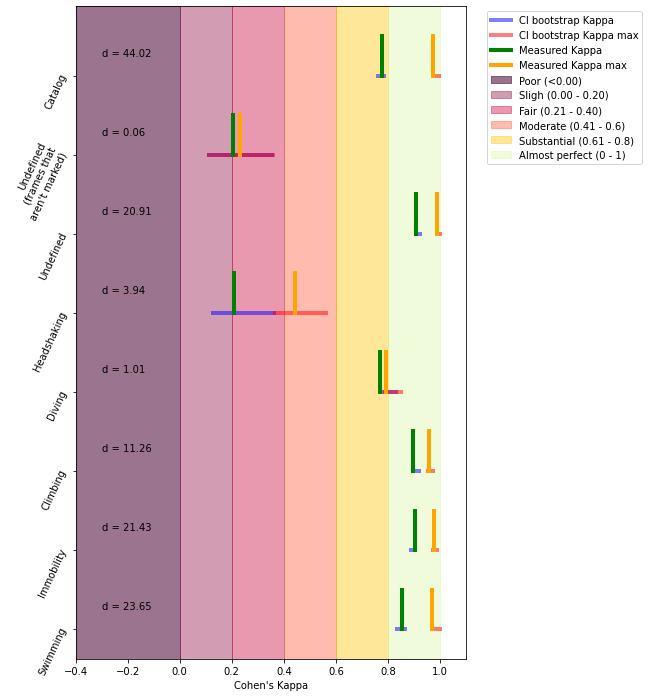

In [30]:
data = get_dados(path)
y_pos = []
fig, ax = plt.subplots()
fig.set_size_inches(7, 12)

for i, cat in enumerate(data['ls_cat_txt'], 1):
    amax = get_descritor_catalogo(data, cat, 'kappa', False, True)
    ames = get_descritor_catalogo(data, cat, 'kappa', False, False)
    
    confidence = 0.95
    generate = cret_line(i)
    con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    
    
    d = es.get_d_cohen(amax, ames)
    text = ax.text(1, 1, "d = {:.2f}".format(d))
    text.set_position((-0.3, i + 0.25))
    
    y_pos.append(i)

    k = get_cate_medida(data, cat, False)['kappa']
    k_max = get_cate_medida(data, cat, True)['kappa']
    
    
    if(i==1):
        ax.plot(con_m, generate, label = "CI bootstrap Kappa", color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, label = "CI bootstrap Kappa max", color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i), label = "Measured Kappa", color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i),label = "Measured Kappa max", color= "orange", linewidth=4.0)
        
    else:
        ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
        
        
        
        
        
        
# codigo muito ruim        
i = len(data['ls_cat_txt'] ) + 1
amax = dt_max['kappa']
ames = dt['kappa']
       
confidence = 0.95
generate = cret_line(i)
con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
print(con_m, con_max)
d = es.get_d_cohen(amax, ames)
text = ax.text(1, 1, "d = {:.2f}".format(d))
text.set_position((-0.3, i + 0.25))

y_pos.append(i)
# axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")

k     = data['medido']["catalogo_var"]['kappa']
k_max = data['medido']["catalogo_var_max"]['kappa']     
        
ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)

ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
# Eventualmente tem que limpar esse codigo
        
        
    
    
        
ax.set_xlim([-0.4, 1.1])
ax.axvspan(0, -0.4, alpha=0.6, color='#581845', label = "Poor (<0.00)")
ax.axvspan(0, 0.2, alpha=0.4, color='#900C3F', label = "Sligh (0.00 - 0.20)")
ax.axvspan(0.2, 0.4, alpha=0.4, color='#C70039', label = "Fair (0.21 - 0.40)")
ax.axvspan(0.4, 0.6, alpha=0.4, color='#FF5733', label = "Moderate (0.41 - 0.6)")
ax.axvspan(0.6, 0.8, alpha=0.4, color='#FFC300', label = "Substantial (0.61 - 0.8)")
ax.axvspan(0.8, 1, alpha=0.4, color='#DAF7A6', label = "Almost perfect (0 - 1)")

lgd = ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# ax.legend()
ax.set_yticks(y_pos)
data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
data['ls_cat_txt'].append("Catalog")
ax.set_yticklabels(data['ls_cat_txt'], rotation=65)
ax.set_xlabel("Cohen's Kappa")
plt.savefig('catalogo categorias kappa.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [31]:
get_descritor_catalogo(data, 'Swimming', 'vies', False, True)

[0.00265076,
 0.00265076,
 0.00265076,
 0.00265076,
 0.00265076,
 0.00201342,
 0.00201342,
 0.00201342,
 0.00201342,
 0.00201342,
 0.00203114,
 0.00203114,
 0.00203114,
 0.00203114,
 0.00203114,
 0.00267738,
 0.00267738,
 0.00267738,
 0.00267738,
 0.00267738,
 0.00334001,
 0.00334001,
 0.00334001,
 0.00334001,
 0.00334001,
 0.00401606,
 0.00401606,
 0.00401606,
 0.00401606,
 0.00401606,
 0.00133511,
 0.00133511,
 0.00133511,
 0.00133511,
 0.00133511,
 0.00132714,
 0.00132714,
 0.00132714,
 0.00132714,
 0.00132714,
 0.000678887,
 0.000678887,
 0.000678887,
 0.000678887,
 0.000678887,
 0.00397878,
 0.00397878,
 0.00397878,
 0.00397878,
 0.00397878,
 0.00130976,
 0.00130976,
 0.00130976,
 0.00130976,
 0.00130976,
 0.003427,
 0.003427,
 0.003427,
 0.003427,
 0.003427,
 0,
 0,
 0,
 0,
 0,
 0.00200267,
 0.00200267,
 0.00200267,
 0.00200267,
 0.00200267,
 0.00134589,
 0.00134589,
 0.00134589,
 0.00134589,
 0.00134589,
 0.00409277,
 0.00409277,
 0.00409277,
 0.00409277,
 0.00409277,
 0.0047879

In [32]:
get_descritor_catalogo(data, 'Immobility', 'vies', False, True)

[0.00820189,
 0.00820189,
 0.00820189,
 0.00820189,
 0.00820189,
 0.00505051,
 0.00505051,
 0.00505051,
 0.00505051,
 0.00505051,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00412044,
 0.00412044,
 0.00412044,
 0.00412044,
 0.00412044,
 0.00377121,
 0.00377121,
 0.00377121,
 0.00377121,
 0.00377121,
 0.00836282,
 0.00836282,
 0.00836282,
 0.00836282,
 0.00836282,
 0.00569801,
 0.00569801,
 0.00569801,
 0.00569801,
 0.00569801,
 0.00600696,
 0.00600696,
 0.00600696,
 0.00600696,
 0.00600696,
 0.00792142,
 0.00792142,
 0.00792142,
 0.00792142,
 0.00792142,
 0.0070086,
 0.0070086,
 0.0070086,
 0.0070086,
 0.0070086,
 0.00568003,
 0.00568003,
 0.00568003,
 0.00568003,
 0.00568003,
 0.00508259,
 0.00508259,
 0.00508259,
 0.00508259,
 0.00508259,
 0.00540369,
 0.00540369,
 0.00540369,
 0.00540369,
 0.00540369,
 0.00577664,
 0.00577664,
 0.00577664,
 0.00577664,
 0.00577664,
 0.00733418,
 0.00733418,
 0.00733418,
 0.00733418,
 0.00733418,
 0.00820189,
 0.00820189,
 0.00820189,
 0.008

[0.350563 0.418716] [0.350563 0.418716]
[0.532946 0.568274] [0.532946 0.568274]
[0.203556 0.278784] [0.203556 0.278784]
[0.72802  0.787776] [0.72802  0.787776]
[0.920322 0.942134] [0.920322 0.942134]
[0.623265 0.652766] [0.623265 0.652766]
[0.93291  0.953339] [0.93291  0.953339]
[0.642713 0.660476] [0.728278 0.742788]


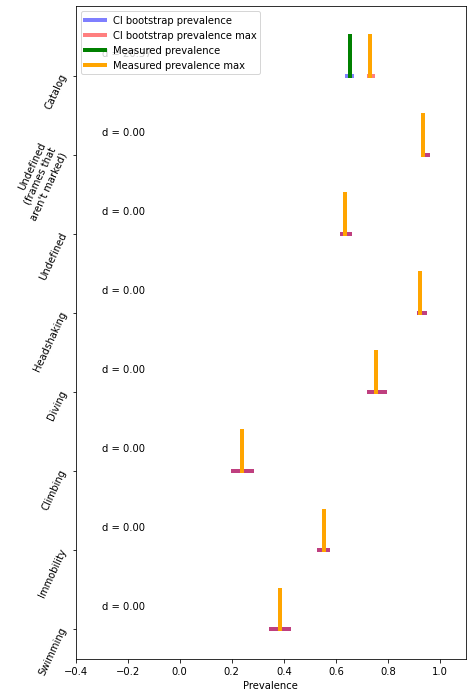

In [33]:
data = get_dados(path)
y_pos = []
fig, ax = plt.subplots()
fig.set_size_inches(7, 12)

dt =     es.get_descritores_max(False, data)
dt_max = es.get_descritores_max(True, data)

for i, cat in enumerate(data['ls_cat_txt'], 1):
    amax = get_descritor_catalogo(data, cat, 'prevalencia', False, True)
    ames = get_descritor_catalogo(data, cat, 'prevalencia', False, False)
    
    confidence = 0.95
    generate = cret_line(i)
    con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    print(con_m, con_max)
    d = es.get_d_cohen(amax, ames)
    text = ax.text(1, 1, "d = {:.2f}".format(d))
    text.set_position((-0.3, i + 0.25))
    
    y_pos.append(i)

    k = get_cate_medida(data, cat, False)['prevalencia']
    k_max = get_cate_medida(data, cat, True)['prevalencia']
    
    
    if(i==1):
        ax.plot(con_m, generate, label = "CI bootstrap prevalence", color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, label = "CI bootstrap prevalence max", color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i), label = "Measured prevalence", color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i),label = "Measured prevalence max", color= "orange", linewidth=4.0)
        
    else:
        ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)


# codigo muito ruim        
i = len(data['ls_cat_txt'] ) + 1
amax = dt_max['prevalencia']
ames = dt['prevalencia']
       
confidence = 0.95
generate = cret_line(i)
con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
print(con_m, con_max)
d = es.get_d_cohen(amax, ames)
text = ax.text(1, 1, "d = {:.2f}".format(d))
text.set_position((-0.3, i + 0.25))

y_pos.append(i)
# axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")

k     = data['medido']["catalogo_var"]['prevalencia']
k_max = data['medido']["catalogo_var_max"]['prevalencia']



ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)

ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
# arrumar até aqui        
        
        
        




ax.set_xlim([-0.4, 1.1])
ax.legend()
ax.set_yticks(y_pos)
data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
data['ls_cat_txt'].append("Catalog")
ax.set_yticklabels(data['ls_cat_txt'], rotation=65)
ax.set_xlabel("Prevalence")
plt.savefig('prevalence kappa.png')
plt.show()

In [34]:
amax = get_descritor_catalogo(data, cat, 'prevalencia', False, True)
ames = get_descritor_catalogo(data, cat, 'prevalencia', False, False)
print(amax)

[0.942779, 0.942779, 0.942779, 0.942779, 0.942779, 0.947368, 0.947368, 0.947368, 0.947368, 0.947368, 0.942675, 0.942675, 0.942675, 0.942675, 0.942675, 0.938462, 0.938462, 0.938462, 0.938462, 0.938462, 0.939891, 0.939891, 0.939891, 0.939891, 0.939891, 0.941494, 0.941494, 0.941494, 0.941494, 0.941494, 0.943192, 0.943192, 0.943192, 0.943192, 0.943192, 0.951087, 0.951087, 0.951087, 0.951087, 0.951087, 0.936594, 0.936594, 0.936594, 0.936594, 0.936594, 0.94837, 0.94837, 0.94837, 0.94837, 0.94837, 0.943739, 0.943739, 0.943739, 0.943739, 0.943739, 0.946838, 0.946838, 0.946838, 0.946838, 0.946838, 0.935805, 0.935805, 0.935805, 0.935805, 0.935805, 0.939781, 0.939781, 0.939781, 0.939781, 0.939781, 0.947273, 0.947273, 0.947273, 0.947273, 0.947273, 0.935921, 0.935921, 0.935921, 0.935921, 0.935921, 0.952468, 0.952468, 0.952468, 0.952468, 0.952468, 0.944245, 0.944245, 0.944245, 0.944245, 0.944245, 0.948463, 0.948463, 0.948463, 0.948463, 0.948463, 0.93688, 0.93688, 0.93688, 0.93688, 0.93688, 0.936094,

In [35]:
print(ames)

[0.942779, 0.942779, 0.942779, 0.942779, 0.942779, 0.947368, 0.947368, 0.947368, 0.947368, 0.947368, 0.942675, 0.942675, 0.942675, 0.942675, 0.942675, 0.938462, 0.938462, 0.938462, 0.938462, 0.938462, 0.939891, 0.939891, 0.939891, 0.939891, 0.939891, 0.941494, 0.941494, 0.941494, 0.941494, 0.941494, 0.943192, 0.943192, 0.943192, 0.943192, 0.943192, 0.951087, 0.951087, 0.951087, 0.951087, 0.951087, 0.936594, 0.936594, 0.936594, 0.936594, 0.936594, 0.94837, 0.94837, 0.94837, 0.94837, 0.94837, 0.943739, 0.943739, 0.943739, 0.943739, 0.943739, 0.946838, 0.946838, 0.946838, 0.946838, 0.946838, 0.935805, 0.935805, 0.935805, 0.935805, 0.935805, 0.939781, 0.939781, 0.939781, 0.939781, 0.939781, 0.947273, 0.947273, 0.947273, 0.947273, 0.947273, 0.935921, 0.935921, 0.935921, 0.935921, 0.935921, 0.952468, 0.952468, 0.952468, 0.952468, 0.952468, 0.944245, 0.944245, 0.944245, 0.944245, 0.944245, 0.948463, 0.948463, 0.948463, 0.948463, 0.948463, 0.93688, 0.93688, 0.93688, 0.93688, 0.93688, 0.936094,

In [36]:
def cr_f_categoria(categoria):
    def filter_categoria(element):
        return element['categoria'] == categoria
    return filter_categoria

def map_element(element):
    return lambda x: x[element]
#     def c_map(element):
#         return element['list_kappa_cat']
#     def c_map_2(element):
#         return element
# strin = ""
# if(r_max):
#     strin = "list_kappa_cat_max"
# else:
#     strin = "list_kappa_cat"

# saida = []
# if (r_medido):
#     saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])

# else:
saida = []
for item in data['varios_kappa']:
    saida.append(list(filter(cr_f_categoria('Swimming'), item['list_kappa_cat_max']))[0]) 


#     print(saida)
# saida = list(map(map_element('prevalencia'), saida))
saida

[{'categoria': 'Swimming',
  'observada': 0.997349,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.993956,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[488, 4], [0, 1017]]},
 {'categoria': 'Swimming',
  'observada': 0.997349,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.993956,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[488, 4], [0, 1017]]},
 {'categoria': 'Swimming',
  'observada': 0.997349,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.993956,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[488, 4], [0, 1017]]},
 {'categoria': 'Swimming',
  'observada': 0.997349,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.993956,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[488, 4], [0, 1017]]},
 {'categoria': 'Swimming',
  'observada': 0.997349,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.993956,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[488, 4], [0, 1017]]},
 {'categoria': 'Swimming',
  'observada'

In [37]:
saida = []
for item in data['varios_kappa']:
    saida.append(list(filter(cr_f_categoria('Swimming'), item['list_kappa_cat']))[0]) 


#     print(saida)
# saida = list(map(map_element('prevalencia'), saida))
saida

[{'categoria': 'Swimming',
  'observada': 0.937707,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.857959,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[443, 49], [45, 972]]},
 {'categoria': 'Swimming',
  'observada': 0.937707,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.857959,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[443, 49], [45, 972]]},
 {'categoria': 'Swimming',
  'observada': 0.937707,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.857959,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[443, 49], [45, 972]]},
 {'categoria': 'Swimming',
  'observada': 0.937707,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.857959,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[443, 49], [45, 972]]},
 {'categoria': 'Swimming',
  'observada': 0.937707,
  'acaso': 0.561444,
  'vies': 0.00265076,
  'kappa': 0.857959,
  'prevalencia': 0.350563,
  'matriz_concordancia': [[443, 49], [45, 972]]},
 {'categoria': 'Swimming',
  'obser

[0.         0.00608931] [0.         0.00608931]
[0.00378191 0.00913098] [0.00378191 0.00913098]
[0.0135635 0.0215599] [0.0135635 0.0215599]
[0.0332779 0.0428932] [0.0332779 0.0428932]
[0.0302491 0.040395 ] [0.0302491 0.040395 ]
[0.00028531 0.0040311 ] [0.00028531 0.0040311 ]
[0.0379747 0.0478771] [0.0379747 0.0478771]
[0.0020232 0.0109282] [0.125151 0.139954]


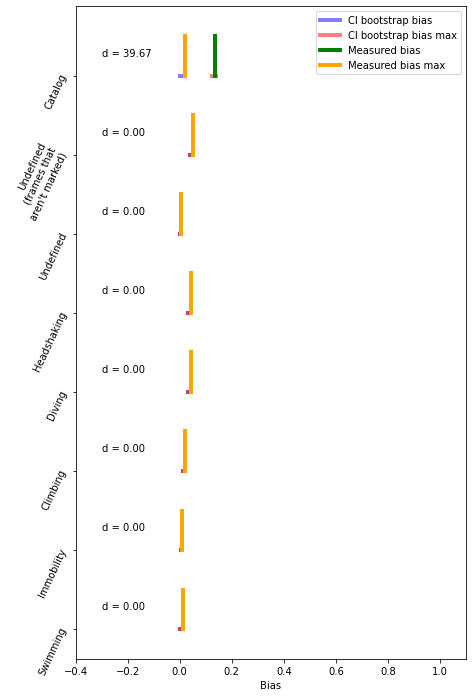

In [38]:
data = get_dados(path)



y_pos = []
fig, ax = plt.subplots()
fig.set_size_inches(7, 12)

for i, cat in enumerate(data['ls_cat_txt'], 1):
    amax = get_descritor_catalogo(data, cat, 'vies', False, True)
    ames = get_descritor_catalogo(data, cat, 'vies', False, False)
    
    confidence = 0.95
    generate = cret_line(i)
    con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    print(con_m, con_max)
    d = es.get_d_cohen(amax, ames)
    text = ax.text(1, 1, "d = {:.2f}".format(d))
    text.set_position((-0.3, i + 0.25))
    
    y_pos.append(i)

    k = get_cate_medida(data, cat, False)['vies']
    k_max = get_cate_medida(data, cat, True)['vies']
    
    
    if(i==1):
        ax.plot(con_m, generate, label = "CI bootstrap bias", color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, label = "CI bootstrap bias max", color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i), label = "Measured bias", color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i),label = "Measured bias max", color= "orange", linewidth=4.0)
        
    else:
        ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
        ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
        ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
        ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)

        
        # codigo muito ruim        
i = len(data['ls_cat_txt'] ) + 1
amax = dt_max['vies']
ames = dt['vies']
       
confidence = 0.95
generate = cret_line(i)
con_m   = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
con_max = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
print(con_m, con_max)
d = es.get_d_cohen(amax, ames)
text = ax.text(1, 1, "d = {:.2f}".format(d))
text.set_position((-0.3, i + 0.25))

y_pos.append(i)
# axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")

k     = data['medido']["catalogo_var"]['vies']
k_max = data['medido']["catalogo_var_max"]['vies']     
        
ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)

ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
# Eventualmente tem que limpar esse codigo



ax.set_xlim([-0.4, 1.1])
ax.legend()
ax.set_yticks(y_pos)
data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
data['ls_cat_txt'].append("Catalog")
ax.set_yticklabels(data['ls_cat_txt'], rotation=65)
ax.set_xlabel("Bias")
plt.savefig('categorias vies.png')
plt.show()